This is a simple notebook to generate linear data with some (non-Gaussian) scatter, and do linear fits with different loss functions.

It accompanies Chapter 5 of the book (1 of 5).

Author: Viviana Acquaviva

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict
from sklearn.model_selection import KFold
from sklearn import linear_model #New!

%matplotlib inline

font = {'size'   : 16}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
matplotlib.rcParams.update({'figure.autolayout': False})
matplotlib.rcParams['figure.dpi'] = 300

#### We begin by generating some data.

In [30]:
np.random.seed(16) #set seed for reproducibility purposes

x = np.arange(100) 

yp = 3*x + 3 + 5*(np.random.poisson(3*x+3,100)-(3*x+3)) #generate some data with scatter following Poisson distribution 
                                                    #with exp value = y from linear model, centered around 0

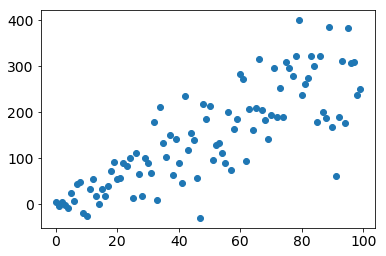

In [31]:
#Let's take a look!

plt.scatter(x, yp);

#### Here comes the linear regression model ;) 

In [32]:
model = linear_model.LinearRegression() #this minimized the MSE

In [33]:
model

LinearRegression()

I can fit the model (right now, I will do it using the entire data set just to compare with the analytic solution). When only one predictor is present, I need to reshape it to column form.

In [34]:
model.fit(x.reshape(-1,1),yp) 

LinearRegression()

The fitted model has attributes "coef_", "intercept_"

In [35]:
slope, intercept = model.coef_, model.intercept_

In [36]:
print(slope, intercept)

[3.06189619] -4.813861386138683


We can plot the original and the fitted line.

Text(0, 0.5, 'Y')

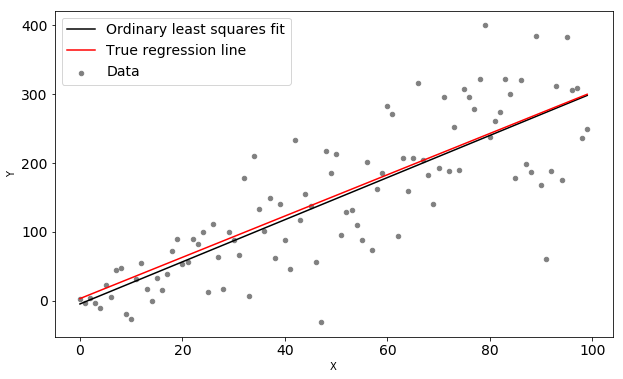

In [37]:
plt.figure(figsize = (10,6))
plt.scatter(x,yp, s = 20, c = 'gray', label = 'Data')
plt.plot(x, slope*x + intercept, c ='k', label = 'Ordinary least squares fit')
plt.plot(x, 3*x + 3, c = 'r', label = 'True regression line')
plt.legend(fontsize = 14)
plt.xlabel('X')
plt.ylabel('Y')

What are the analytic predictions for the coefficients?

In [38]:
#Predictions - fill in the analytic formula

theta1 = np.cov(x, yp, bias=True)[0,1]/np.var(x)

theta0 = np.mean(yp) - theta1 * np.mean(x)

In [39]:
print('Theta_0, Theta_1:', theta0, theta1)

Theta_0, Theta_1: -4.813861386138626 3.0618961896189623


I can also obtain the second one in the variance/covariance notation (note: the small difference is due to 1/n vs 1/(n-1) in the definition)

#### We can (and should!) do cross validation and all the nice things we have learned to do for classification problems.

In [40]:
cv = KFold(n_splits = 5 , shuffle = True , random_state = 10)

In [41]:
scores = cross_validate(model, x.reshape(-1,1), yp, cv = cv, return_train_score = True)

In [42]:
scores

{'fit_time': array([0.00083399, 0.0005672 , 0.0006392 , 0.00088811, 0.00071502]),
 'score_time': array([0.00058007, 0.00050592, 0.00062609, 0.00055075, 0.00084829]),
 'test_score': array([0.67732038, 0.5242487 , 0.72842171, 0.17839131, 0.77833495]),
 'train_score': array([0.66463642, 0.68769733, 0.63967751, 0.72698135, 0.62744984])}

In [43]:
print('{:.3f}'.format(scores['test_score'].mean()), '{:.3f}'.format(scores['test_score'].std()))
print('{:.3f}'.format(scores['train_score'].mean()), '{:.3f}'.format(scores['train_score'].std()))

0.577 0.217
0.669 0.036


### Questions: 

- What are the scores that are being printed out? R2 scores!

- How are the scores? Not so great; R2 is hard to intepret though.

- Does it suffer from high variance? High bias? The scores are similar (or at least, they are within one standard deviation from each other!) but both are pretty bad. 

- What would happen to the scores if we increased the scatter (noise)? They would become much worse.

### <font color='green'> Scoring in regression problems. </font>

### Here is a way to visualize all the available scorers.

In [17]:
print(sorted(sklearn.metrics.SCORERS.keys()))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']


### Do you recognize some of them?

Let's see if we can find the MSE.

In [44]:
scores = cross_validate(model, x.reshape(-1,1), yp, cv = cv, scoring = 'neg_mean_squared_error', return_train_score = True)

In [45]:
print('{:.3f}'.format(scores['test_score'].mean()), '{:.3f}'.format(scores['test_score'].std()))
print('{:.3f}'.format(scores['train_score'].mean()), '{:.3f}'.format(scores['train_score'].std()))

-4179.614 1090.140
-3825.885 238.629


Can also try MAE

In [46]:
scores = scores = cross_validate(model, x.reshape(-1,1), yp, cv = cv, scoring = 'neg_mean_absolute_error', return_train_score = True)

In [47]:
print('{:.3f}'.format(scores['test_score'].mean()), '{:.3f}'.format(scores['test_score'].std()))
print('{:.3f}'.format(scores['train_score'].mean()), '{:.3f}'.format(scores['train_score'].std()))

-48.653 4.870
-47.311 1.451


By plotting the residuals, we can see that they are independent of x (the assumptions of the probabilistic linear model are not satisfied). But that doesn't mean we can't create a model.

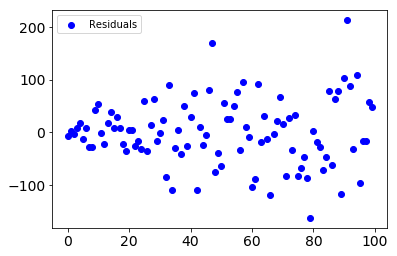

In [48]:
plt.scatter(x, slope*x + intercept - yp, color = 'b', label = 'Residuals')

plt.legend();

### Custom scores

We might like to implement a scorer where we care about percentage error instead. Here is how to do a custom scorer:

In [50]:
from sklearn.metrics import make_scorer

In [51]:
def mape(true,pred): #Modified Mean Absolute Percentage Error
    return np.mean(np.abs(true-pred)/(0.5*(true+pred)))

mape_scorer = make_scorer(mape, greater_is_better = False)

In [52]:
scores = cross_validate(model, x.reshape(-1,1), yp, cv = cv, scoring = mape_scorer, return_train_score = True)

In [53]:
scores

{'fit_time': array([0.00116086, 0.00097704, 0.00107193, 0.00084996, 0.00063515]),
 'score_time': array([0.00025606, 0.00026608, 0.00036693, 0.00020194, 0.00016999]),
 'test_score': array([-0.37089314, -0.25475539,  4.0432695 , -0.44874998, -0.89625131]),
 'train_score': array([-2.4402208 ,  0.06361138, -0.62522705,  0.283737  , -0.81601369])}

In [54]:
print('{:.3f}'.format(scores['test_score'].mean()), '{:.3f}'.format(scores['test_score'].std()))
print('{:.3f}'.format(scores['train_score'].mean()), '{:.3f}'.format(scores['train_score'].std()))

0.415 1.827
-0.707 0.959


#### Note: as we already discussed, so far we have not changed the loss function (MSE), or the coefficients of the model. We have only looked at different evaluation metrics.

#### <font color = 'green'> Question 1: would the best fit line change if we optimize a different loss function? </font>

Yes.

#### <font color = 'green'> Question 2: How can we implement that without an analytic solution? </font>

Numerical methods: 1) To find the derivatives; 2) Grid Search.














This is an example using the Mean Square Error.

In [66]:
theta0 = np.linspace(-5,5,200)
theta1 = np.linspace(-5,5,200)

In [67]:
mse = np.empty((200,200))

for i,t0 in enumerate(theta0):
    for j,t1 in enumerate(theta1):
        mse[i,j] = np.sum((t0 + t1*x - yp)**2)/len(yp)

To get the indices of the 2D array, I need to unravel it

In [68]:
np.unravel_index(mse.argmin(), mse.shape)

(25, 160)

I can now find the minimum MSE (not very informative, TBH) and the best fit coefficients:

In [69]:
mse[25,160]

3861.3874131966363

In [70]:
theta0[25], theta1[160]

(-3.7437185929648242, 3.0402010050251267)

#### Question: How do they compare to the ones found by the Linear Model / analytic ones? Quite similar.

It will be interesting to see what happens to the parameters if we use a different loss function (MAE, MAPE, Huber loss).

However, because these data are so regular, it's kind of boring, so before trying the different losses let's inject some outliers in the data.

### What happens when we add outliers?

In [71]:
np.random.seed(12) #set 
out = np.random.choice(100,15) #select 15 outliers indexes
yp_wo = np.copy(yp)
np.random.seed(12) #set again
yp_wo[out] = yp_wo[out] + 5*np.random.rand(15)*yp[out]

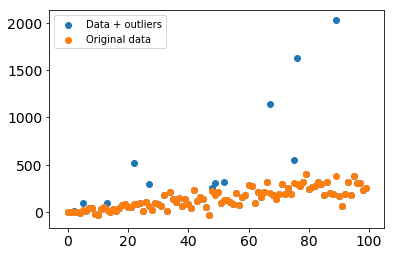

In [72]:
plt.scatter(x,yp_wo, label = 'Data + outliers')
plt.scatter(x,yp, label = 'Original data')
plt.legend();

We can see the effect for the MSE loss right away:

In [73]:
model.fit(x.reshape(-1,1),yp_wo)

slope, intercept = model.coef_, model.intercept_

print(slope, intercept) #it shot upwards!

[4.25153915] -10.4811881188119


### I think that doing this exercise for the other loss functions will be in the HW.